In [1]:
import requests
import pandas as pd
import numpy as np
import sklearn.cluster as cluster
from sklearn.preprocessing import normalize, MinMaxScaler

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Step 1
### Data filtering

This part of the notebook shows the code utilized to filter the `full dataframe` based on TOC occurences.

The `full dataframe` was created using well log data and geochemical data, available from [REATE](https://reate.cprm.gov.br/arquivos/index.php/s/MSYSOk8HApYAT7w) or obtained from ANP upon request.

The `full dataframe` was compiled by [Bione et al. (2024)](https://doi.org/10.1016/j.marpetgeo.2024.106765) and the data is stored in [Zenodo](https://zenodo.org/doi/10.5281/zenodo.10680485).

The first step consists of:

1. Reading the full data frame;
2. Dropping unnecessary columns;
2. Dropping data entries with no TOC data.

In [2]:
# Downloading the full dataframe from the Zenodo repository
URL = "https://zenodo.org/records/10680486/files/full_df.csv?download=1"
response = requests.get(URL)
open("../data/full_df.csv", "wb").write(response.content)

114123999

In [3]:
# Reading the full dataframe.
full_df = pd.read_csv(r'..\data\full_df.csv')
cols = ['WELL', 'LAT', 'LON', 'DEPT', 'CALI', 'DT', 'NPHI', 'RHOB', 'RESD', 'GR','TOC']

# Selecting only the necessary columns.
df = full_df[cols]

# Dropping data entries with no 'TOC' data.
df = df[df['TOC'].notna()]

df.describe()

,WELL,LAT,LON,DEPT,CALI,DT,NPHI,RHOB,RESD,GR,TOC
count,6642.000000,6642.000000,6642.000000,6642.000000,4992.000000,5977.000000,2932.000000,4197.000000,6434.000000,6350.000000,6642.000000
mean,54.932249,-19.471334,-39.683089,2557.836610,10.313779,91.912435,21.780919,2.456353,5.557671,100.303732,1.449741
std,36.941102,0.498661,0.142720,1209.207846,2.037545,21.085580,12.060304,0.160263,17.154332,34.868747,1.242030
min,1.000000,-20.952024,-39.888090,500.000000,0.605200,8.003250,0.000000,1.816010,0.202970,20.307090,0.030000
25%,24.000000,-19.670380,-39.797810,1635.000000,8.814960,76.630970,12.877795,2.350940,1.315692,77.863375,0.800000
50%,44.000000,-19.378330,-39.739680,2250.000000,9.807250,90.822400,22.009685,2.473140,1.957820,98.916130,1.220000
75%,85.000000,-19.137220,-39.510580,3214.500000,11.789050,105.134800,31.699750,2.572070,4.239275,120.811725,1.690000
max,130.000000,-18.286320,-39.316733,6404.900000,16.000000,419.571600,44.878300,2.989470,369.927700,282.875000,21.630000


# Step 2
### Spatial clustering

This part of the notebook shows the code utilized to obtain the  `CLUSTER` feature, based on spatial clustering.

The substeps applyed are:

1. Normalize the Latitute, Longitude and Depth values;
2. Apply the KMeans clustering;
3. Add the classification values as a new feature to the data frame.

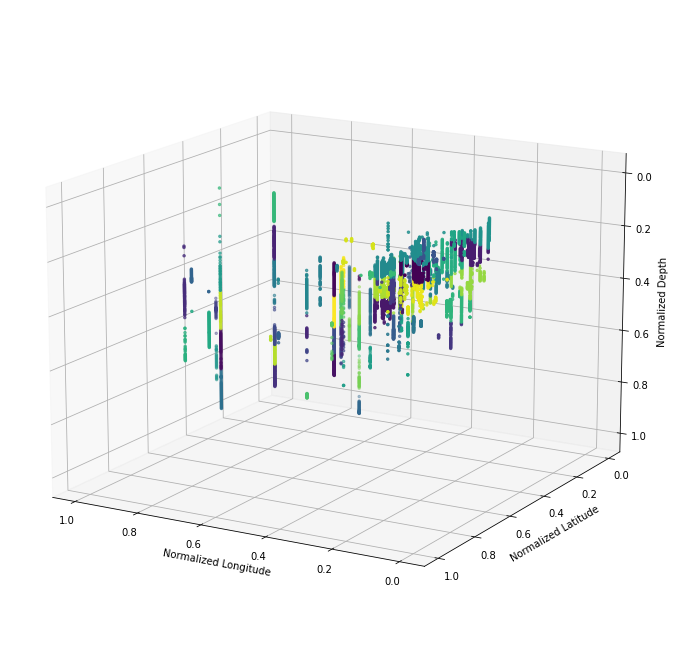

Number of clusters: 64
Cluster number of each data point:  [11 11 11 ... 43 43 43]


In [4]:
# Selecting and normalizing Latitude, Longitude and Depth features.
xyz_arr = df[["LON","LAT","DEPT"]].to_numpy()
scaler = MinMaxScaler()
xyz_arr = scaler.fit_transform(xyz_arr)

# Creating the clustering model, fitting it to the array and predicting the groups.
model = cluster.KMeans(n_clusters=64, random_state=2, n_init = 10)
model.fit_predict(xyz_arr)
clusters = model.fit_predict(xyz_arr)

# Adding the clusters values as a feature column to the dataframe.
df['CLUSTER'] = clusters+1

# Plotting the results.
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
ax.view_init(azim=120, elev=15)
ax.invert_zaxis()
ax.invert_yaxis()
ax.invert_xaxis()

ax.scatter(xyz_arr[:,0], xyz_arr[:,1], xyz_arr[:,2], c=model.labels_, s=6)

ax.set_xlabel('Normalized Longitude')
ax.set_ylabel('Normalized Latitude')
ax.set_zlabel('Normalized Depth')


plt.show()

print(f"Number of clusters: {len(set(model.labels_))}")
print('Cluster number of each data point: ', model.labels_)

In [5]:
df.describe()

,WELL,LAT,LON,DEPT,CALI,DT,NPHI,RHOB,RESD,GR,TOC,CLUSTER
count,6642.000000,6642.000000,6642.000000,6642.000000,4992.000000,5977.000000,2932.000000,4197.000000,6434.000000,6350.000000,6642.000000,6642.000000
mean,54.932249,-19.471334,-39.683089,2557.836610,10.313779,91.912435,21.780919,2.456353,5.557671,100.303732,1.449741,28.900933
std,36.941102,0.498661,0.142720,1209.207846,2.037545,21.085580,12.060304,0.160263,17.154332,34.868747,1.242030,19.223171
min,1.000000,-20.952024,-39.888090,500.000000,0.605200,8.003250,0.000000,1.816010,0.202970,20.307090,0.030000,1.000000
25%,24.000000,-19.670380,-39.797810,1635.000000,8.814960,76.630970,12.877795,2.350940,1.315692,77.863375,0.800000,11.000000
50%,44.000000,-19.378330,-39.739680,2250.000000,9.807250,90.822400,22.009685,2.473140,1.957820,98.916130,1.220000,30.000000
75%,85.000000,-19.137220,-39.510580,3214.500000,11.789050,105.134800,31.699750,2.572070,4.239275,120.811725,1.690000,43.000000
max,130.000000,-18.286320,-39.316733,6404.900000,16.000000,419.571600,44.878300,2.989470,369.927700,282.875000,21.630000,64.000000


# Step 3
### Target filtering

This part of the notebook shows the code utilized to filter the `TOC` target, based on the IQR method.

The substeps applyed are:

1. Get a list of all unique wells in the dataframe and, for each well;
2. Obtain the upper and lower quantiles and calculate the IQR range;
3. Filter the TOC values based on the IQR range;
4. Drop TOC values outside the IQR window, and save the dataframe.

In [7]:
wells = list(df['WELL'].unique())
    
for well_id in range(0, len(wells)):    
            
    df_ = df.loc[df['WELL'] == wells[well_id]]
    
    Q1 = df_['TOC'].quantile(0.25)
    Q3 = df_['TOC'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
  
    df_.loc[df_['TOC'] > upper, 'TOC'] = np.nan
    df_.loc[df_['TOC'] < lower, 'TOC'] = np.nan
    
    df.loc[df['WELL'] == wells[well_id], 'TOC'] = df_['TOC']
    
    
df = df[df['TOC'].notna()]


df.describe()

,WELL,LAT,LON,DEPT,CALI,DT,NPHI,RHOB,RESD,GR,TOC,CLUSTER
count,6282.000000,6282.000000,6282.000000,6282.000000,4699.000000,5658.000000,2706.000000,3921.000000,6094.000000,6012.000000,6282.000000,6282.000000
mean,54.832856,-19.461167,-39.683557,2542.445925,10.350652,91.839319,21.496824,2.457980,5.393372,100.095315,1.355496,29.003502
std,37.009580,0.492263,0.141710,1194.572112,2.038469,20.990044,12.047237,0.159503,16.576430,34.968907,1.013444,19.079359
min,1.000000,-20.952024,-39.888090,500.000000,0.605200,8.003250,0.000000,1.816010,0.202970,20.307090,0.030000,1.000000
25%,23.000000,-19.637620,-39.795320,1635.000000,8.839825,76.734823,12.593725,2.353500,1.314582,77.558145,0.780000,12.000000
50%,44.000000,-19.357120,-39.739680,2243.000000,9.874650,90.903485,21.947900,2.474690,1.932040,98.719375,1.190000,30.000000
75%,84.000000,-19.137220,-39.510580,3200.675000,11.886120,105.046125,31.293212,2.573600,4.101220,120.796625,1.620000,43.000000
max,130.000000,-18.286320,-39.316733,6404.900000,16.000000,419.571600,44.815190,2.976900,369.927700,282.875000,10.250000,64.000000


# Step 4
### Calculating TOC by the ΔlogR method

This part of the notebook shows the code utilized to calculate TOC by the `ΔlogR method`.

The substeps applyed are:

1. Get a list of all unique wells in the dataframe and, for each well
2. Calculate the normalized DT and RESD values;
3. Obtain the absolute difference between the normalized DT and RESD;
4. Identify the baselines, defined by the intersection between these two lines in a given threshold;
5. Apply the ΔlogR equation;
6. Add the calculated ΔlogR TOC to the dataframe.

In [8]:
df['TOC_DlogR'] = np.nan
    
wells_ids = list(df['WELL'].unique())

    
for well_id in range(0, len(wells_ids)):    
            
    df_ = df.loc[df['WELL'] == wells_ids[well_id]]
            
    res_min = df_['RESD'].min()
    res_max = df_['RESD'].max()
    
    dt_min = df_['DT'].min()
    dt_max = df_['DT'].max()
   
    # Normalizing resistivity and sonic curves
    df_ = df_.assign(RESD_norm = lambda x: ((x['RESD'] - res_min) / (res_max - res_min))) 
    df_ = df_.assign(DT_norm = lambda x: ((x['DT'] - dt_min) / (dt_max - dt_min)))
        
    # Obtaining absolute differences between the normalized curves
    df_['DIFF'] = abs(df_['RESD_norm'] - df_['DT_norm'])
    min_dif = df_['DIFF'].min()

    # Finding the 5% range of intersection between the two curves, returns a boolean
    df_['INTERSECT'] = df_['DIFF'].between(min_dif, 0.05)
    
    if True not in df_['INTERSECT'].values:
        
        print(f'Could not find a baseline for well {well_id+1}.')
        df_['TOC_DlogR'] = np.nan
        
    else:
        # Verifying the % of intersecting zone
        true_n = df_['INTERSECT'].value_counts(ascending=True, normalize=True).values[0]
        false_n = df_['INTERSECT'].value_counts(ascending=True, normalize=True).values[1]
        print(f'\nBaseline represents {np.round(true_n * 100, 2)} % of whole data in well {well_id+1}')

        # Finding the baselines based on mean intersecting values.
        df2 = df_[df_.INTERSECT == True]
        res_baseline = df2['RESD'].mean()
        dt_baseline = df2['DT'].mean()

        
        # Applying Passey's ΔlogR equation
        LOM = 10

        df_['DlogR'] = np.log10(df_['RESD'] / res_baseline) + 0.02 * (df_['DT'] - dt_baseline)

        df_['DlogR'].mask(df_['DlogR'] <= 0, 0, inplace=True)

        df_['TOC_DlogR'] = df_['DlogR'] * 10 ** (2.297 - 0.1688 * LOM)

        print(f'\nCalculated TOC for well {well_id+1}:\nMax = {np.round(df_["TOC_DlogR"].max(), 2)}',
                f'\nMedian = {np.round(df_["TOC_DlogR"].median(), 2)}', f'\nMean = {np.round(df_["TOC_DlogR"].mean(), 2)}')

    
    toc_dlogr = df_['TOC_DlogR'].to_numpy()
    
    df.loc[df['WELL'] == wells_ids[well_id], 'TOC_DlogR'] = toc_dlogr  

Could not find a baseline for well 1.
Could not find a baseline for well 2.

Baseline represents 8.7 % of whole data in well 3

Calculated TOC for well 3:
Max = 3.75 
Median = 0.0 
Mean = 0.12

Baseline represents 7.14 % of whole data in well 4

Calculated TOC for well 4:
Max = 1.7 
Median = 0.0 
Mean = 0.33
Could not find a baseline for well 5.

Baseline represents 3.45 % of whole data in well 6

Calculated TOC for well 6:
Max = 4.42 
Median = 2.06 
Mean = 1.8
Could not find a baseline for well 7.

Baseline represents 7.89 % of whole data in well 8

Calculated TOC for well 8:
Max = 3.15 
Median = 1.75 
Mean = 1.67
Could not find a baseline for well 9.
Could not find a baseline for well 10.
Could not find a baseline for well 11.
Could not find a baseline for well 12.
Could not find a baseline for well 13.

Baseline represents 1.54 % of whole data in well 14

Calculated TOC for well 14:
Max = 3.43 
Median = 1.34 
Mean = 1.34

Baseline represents 21.43 % of whole data in well 15

Calcula


Calculated TOC for well 111:
Max = 4.59 
Median = 1.6 
Mean = 1.67
Could not find a baseline for well 112.

Baseline represents 28.57 % of whole data in well 113

Calculated TOC for well 113:
Max = 2.4 
Median = 0.0 
Mean = 0.65

Baseline represents 12.57 % of whole data in well 114

Calculated TOC for well 114:
Max = 2.16 
Median = 0.77 
Mean = 0.79

Baseline represents 1.02 % of whole data in well 115

Calculated TOC for well 115:
Max = 3.91 
Median = 1.55 
Mean = 1.36

Baseline represents 8.91 % of whole data in well 116

Calculated TOC for well 116:
Max = 1.49 
Median = 0.62 
Mean = 0.62

Baseline represents 15.94 % of whole data in well 117

Calculated TOC for well 117:
Max = 27.15 
Median = 0.0 
Mean = 0.5

Baseline represents 3.06 % of whole data in well 118

Calculated TOC for well 118:
Max = 2.58 
Median = 0.0 
Mean = 0.45
Could not find a baseline for well 119.
Could not find a baseline for well 120.
Could not find a baseline for well 121.

Baseline represents 9.52 % of whol

In [9]:
df.describe()

,WELL,LAT,LON,DEPT,CALI,DT,NPHI,RHOB,RESD,GR,TOC,CLUSTER,TOC_DlogR
count,6282.000000,6282.000000,6282.000000,6282.000000,4699.000000,5658.000000,2706.000000,3921.000000,6094.000000,6012.000000,6282.000000,6282.000000,4306.000000
mean,54.832856,-19.461167,-39.683557,2542.445925,10.350652,91.839319,21.496824,2.457980,5.393372,100.095315,1.355496,29.003502,0.645428
std,37.009580,0.492263,0.141710,1194.572112,2.038469,20.990044,12.047237,0.159503,16.576430,34.968907,1.013444,19.079359,1.016440
min,1.000000,-20.952024,-39.888090,500.000000,0.605200,8.003250,0.000000,1.816010,0.202970,20.307090,0.030000,1.000000,0.000000
25%,23.000000,-19.637620,-39.795320,1635.000000,8.839825,76.734823,12.593725,2.353500,1.314582,77.558145,0.780000,12.000000,0.000000
50%,44.000000,-19.357120,-39.739680,2243.000000,9.874650,90.903485,21.947900,2.474690,1.932040,98.719375,1.190000,30.000000,0.187305
75%,84.000000,-19.137220,-39.510580,3200.675000,11.886120,105.046125,31.293212,2.573600,4.101220,120.796625,1.620000,43.000000,1.008659
max,130.000000,-18.286320,-39.316733,6404.900000,16.000000,419.571600,44.815190,2.976900,369.927700,282.875000,10.250000,64.000000,27.150019


In [10]:
# Saving the dataframe
df.to_csv(r'../data/train_test_df.csv', index=False)